# Fake News Classifier using LSTM & bidirectional LSTM.

In [23]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [24]:
tf.__version__

'2.5.0'

In [27]:
data = pd.read_csv("train.csv")

## Understanding the data

In [28]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [29]:
data.shape

(20800, 5)

## Missing Values

In [30]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# We have so many Null values ,so let's drop these Null Values
data = data.dropna()

## Checking for Imbalance Classes

<AxesSubplot:xlabel='label', ylabel='count'>

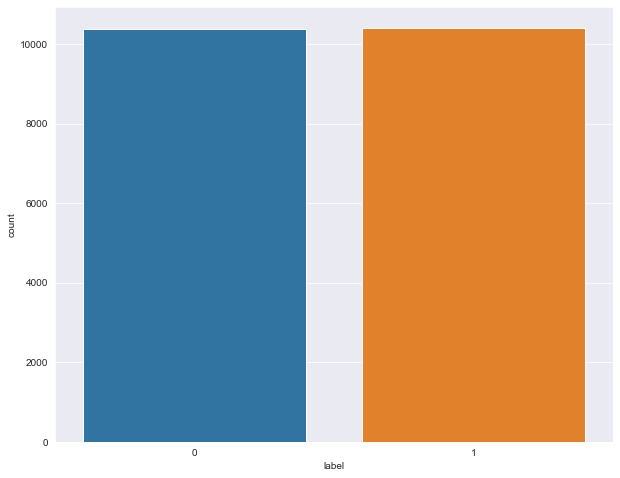

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.countplot(x='label',data=data)

## Model Creation

In [33]:
X = data.drop('label',axis=1)
y = data.label

In [34]:
print(X.shape,y.shape)

(20800, 4) (20800,)


In [35]:
# Now let's import Necessary libraries for LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Dense,Dropout

In [36]:
# Vocabulary Size
voc_size = 5000

In [37]:
messages = X.copy()
##Since we drop Null values from our Dataset ,so we need to Reset Index of our Dataset
messages.reset_index(inplace = True)

In [38]:
messages

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...
20795,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [39]:
# Import necessary libraries for data preprocessing
import nltk
import re
from nltk.corpus import stopwords

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pbona\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Some important information:

#### re.sub()

1.Replace with regular expression
2.Replace multiple substrings with the same string
3.Replace using the matched part
4.Get the count of replaced parts
5.Here we are going to replace all regural expression which are not between a to z or A to Z with whitespace.

#### review.lower():

By this we are going to replace all the words in Lower case,So that all are treated as equally.

#### ps.stem()

Stemming is the process of producing morphological variants of a root/base word. 
Stemming programs are commonly referred to as stemming algorithms or stemmers. 
A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.


In [51]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]',' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

TypeError: expected string or bytes-like object

# One Hot representation

In [52]:
one_hot_lbls = [one_hot(words,voc_size)for words in corpus]
one_hot_lbls

[[3940, 1593, 3945, 2969, 3053, 3717, 3655, 2179, 3401, 688],
 [1205, 3358, 3801, 4990, 4524, 3349, 587],
 [4556, 4823, 4793, 2065],
 [793, 927, 3300, 2252, 3034, 4793],
 [3451, 4524, 2412, 79, 3981, 1333, 4524, 546, 115, 3793],
 [2481,
  1428,
  972,
  2953,
  2133,
  4394,
  3154,
  4665,
  1339,
  2077,
  4073,
  2797,
  816,
  2642,
  587],
 [2507, 2507, 1108, 1611, 2774, 2316, 1595, 357, 2961, 3811, 1194, 3572],
 [251, 4726, 1346, 3015, 719, 4546, 1811, 2093, 487, 3588, 2514],
 [1076, 4307, 886, 1447, 4394, 1105, 4688, 3905, 4564, 4352, 487, 3588, 2514],
 [3242, 2393, 1439, 1817, 1316, 3005, 4394, 3923, 487, 3588, 2514],
 [3122, 4641, 421, 3949, 2641, 3125, 1856, 1247, 4394, 685],
 [3189, 1540, 104, 164, 3162, 3447, 4216, 4037],
 [2357, 3634, 478, 4055, 4650, 1657, 1918, 4835, 4156, 2606, 2031],
 [2252, 955, 3053, 3125, 4394, 1316],
 [2154, 1327, 4437, 2841, 3587, 2116, 4759, 4486, 2184],
 [4931, 4120, 1218, 2063, 1952, 3178, 2347, 487, 3588, 2514],
 [4017, 4462, 3870, 184, 3220, 

## Embedding Representation

### Pad_Sequences:
    
The pad_sequences() function in the Keras deep learning library can be used to pad variable length sequences. 
The default padding value is 0.0, which is suitable for most applications, although this can be changed by specifying the preferred value via the “value” argument.
By this we are going to make all the sentances in same length.There are 2 types of Padding "Pre" and "Post",pre means it's going to add 0 in front and post means it's goint add 0 in back

In [53]:
Embedded_len = pad_sequences(one_hot_lbls,padding='pre',maxlen=20)
print(Embedded_len)

[[   0    0    0 ... 2179 3401  688]
 [   0    0    0 ... 4524 3349  587]
 [   0    0    0 ... 4823 4793 2065]
 ...
 [   0    0    0 ... 4251 3732 3056]
 [   0    0    0 ...  501 1316  283]
 [   0    0    0 ... 2602 1952  587]]


In [54]:
## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


## Bidirectional-LSTM

In [55]:
## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
X_final = np.array(Embedded_len)
y_final = np.array(y)

In [57]:
X_final.shape,y_final.shape

((53, 20), (20800,))

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [53, 20800]

In [ ]:
### Finally Training
model_fit =  model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

In [ ]:
y_pred=model.predict_classes(X_test)

## Performance Matrics & Accuracy

In [ ]:
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(mat,figsize=(6,6),show_normed=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
def plot_learning_curve(model_fit,epochs):
    #Accuracy
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,model_fit.history['accuracy'])
    plt.plot(epoch_range,model_fit.history["val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"],loc ="upper left")
    plt.show()

In [ ]:
plot_learning_curve(model_fit,10)

So We should train our model by 2 epochs,Because at 2 epochs we are getting a Perfect model with perfect accuracy for both train & validation

## Single Prediction

In [ ]:
def predict(text):
    corpus = []
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    print(corpus)
    one_hot_lbls = [one_hot(words,voc_size)for words in corpus]
    print(one_hot_lbls)
    Embedded_len = pad_sequences(one_hot_lbls,padding='pre',maxlen=20)
    print(Embedded_len)
    return model.predict_classes(Embedded_len)

In [ ]:
Text_input = messages.title[1]
predict(Text_input)

In [ ]:
from keras.models import load_model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
model = load_model('my_model.h5')

In [ ]:
def predict(text):
    corpus = []
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    print(corpus)
    one_hot_lbls = [one_hot(words,voc_size)for words in corpus]
    print(one_hot_lbls)
    Embedded_len = pad_sequences(one_hot_lbls,padding='pre',maxlen=20)
    print(Embedded_len)
    return model.predict_classes(Embedded_len)

In [1]:
Text_input = messages.title[1]
predict(Text_input)

NameError: name 'messages' is not defined